<a href="https://colab.research.google.com/github/aydawudu/GCP/blob/main/EDA_improving_data_integrity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load the Dependencies

In [2]:
import tensorflow as tf

print("TensorFlow version: ",tf.version.VERSION)


TensorFlow version:  2.8.2


In [3]:
import os
import pandas as pd  # First, we'll import Pandas, a data processing and CSV file I/O library
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Create Data Directory and Load the Dataset

In [4]:
if not os.path.isdir("../data/transport"):
    os.makedirs("../data/transport")

In [5]:
!gsutil cp gs://cloud-training/mlongcp/v3.0_MLonGC/toy_data/untidy_vehicle_data_toy.csv ../data/transport

Copying gs://cloud-training/mlongcp/v3.0_MLonGC/toy_data/untidy_vehicle_data_toy.csv...
/ [1 files][ 23.7 KiB/ 23.7 KiB]                                                
Operation completed over 1 objects/23.7 KiB.                                     


In [6]:
!ls -l ../data/transport

total 24
-rw-r--r-- 1 root root 24263 Sep  1 18:28 untidy_vehicle_data_toy.csv


# Read Dataset into a Pandas DataFrame

In [7]:
df_transport=pd.read_csv('../data/transport/untidy_vehicle_data_toy.csv')
df_transport.head()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles
0,10/1/2018,90000.0,2006,Gasoline,OTHER/UNK,NaN,1.0
1,10/1/2018,NaN,2014,Gasoline,NaN,Yes,1.0
2,NaN,90000.0,NaN,Gasoline,OTHER/UNK,Yes,NaN
3,10/1/2018,90000.0,2017,Gasoline,OTHER/UNK,Yes,1.0
4,10/1/2018,90000.0,<2006,Diesel and Diesel Hybrid,OTHER/UNK,No,55.0


In [8]:
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        497 non-null    object 
 1   Zip Code    497 non-null    float64
 2   Model Year  497 non-null    object 
 3   Fuel        497 non-null    object 
 4   Make        496 non-null    object 
 5   Light_Duty  496 non-null    object 
 6   Vehicles    496 non-null    float64
dtypes: float64(2), object(5)
memory usage: 27.4+ KB


.info() shows us that there are 5 string objects and 2 float objects. Lets see each columns to determine the objects

In [9]:
print(df_transport)

          Date  Zip Code Model Year                      Fuel       Make  \
0    10/1/2018   90000.0       2006                  Gasoline  OTHER/UNK   
1    10/1/2018       NaN       2014                  Gasoline        NaN   
2          NaN   90000.0        NaN                  Gasoline  OTHER/UNK   
3    10/1/2018   90000.0       2017                  Gasoline  OTHER/UNK   
4    10/1/2018   90000.0      <2006  Diesel and Diesel Hybrid  OTHER/UNK   
..         ...       ...        ...                       ...        ...   
494  12/3/2018   90002.0       2010                  Gasoline     Type_I   
495  12/4/2018   90002.0       2010                  Gasoline     Type_B   
496  12/5/2018   90002.0       2010                  Gasoline     Type_C   
497  12/6/2018   90002.0       2010                  Gasoline     Type_J   
498  12/7/2018   90002.0       2010                  Gasoline     Type_J   

    Light_Duty  Vehicles  
0          NaN       1.0  
1          Yes       1.0  
2     

##Summary Statistics

In [10]:
df_transport.describe()

,Zip Code,Vehicles
count,497.00000,496.000000
mean,89838.23340,74.512097
std,3633.35609,243.839871
min,9001.00000,1.000000
25%,90001.00000,14.000000
50%,90001.00000,25.000000
75%,90001.00000,56.250000
max,90002.00000,3178.000000


In [11]:
df_transport.groupby("Fuel").first()

,Date,Zip Code,Model Year,Make,Light_Duty,Vehicles
Fuel,,,,,,
Battery Electric,10/1/2018,90000.0,<2006,OTHER/UNK,No,4.0
Diesel and Diesel Hybrid,10/1/2018,90000.0,<2006,OTHER/UNK,No,55.0
Flex-Fuel,10/14/2018,90001.0,2007,Type_A,Yes,78.0
Gasoline,10/1/2018,90000.0,2006,OTHER/UNK,Yes,1.0
Hybrid Gasoline,10/24/2018,90001.0,2009,OTHER/UNK,Yes,18.0
Natural Gas,10/25/2018,90001.0,2009,OTHER/UNK,No,2.0
Other,10/8/2018,90000.0,<2006,OTHER/UNK,Yes,6.0
Plug-in Hybrid,11/2/2018,90001.0,2012,OTHER/UNK,Yes,1.0


###Checking for Missing Values

In [12]:
df_transport.isnull().sum()

Date          2
Zip Code      2
Model Year    2
Fuel          2
Make          3
Light_Duty    3
Vehicles      3
dtype: int64

In [13]:
print(df_transport.Date)
df_transport.Date.isnull()


0      10/1/2018
1      10/1/2018
2            NaN
3      10/1/2018
4      10/1/2018
         ...    
494    12/3/2018
495    12/4/2018
496    12/5/2018
497    12/6/2018
498    12/7/2018
Name: Date, Length: 499, dtype: object


0      False
1      False
2       True
3      False
4      False
       ...  
494    False
495    False
496    False
497    False
498    False
Name: Date, Length: 499, dtype: bool

In [14]:
print (df_transport['Make'])
print (df_transport['Make'].isnull())

0      OTHER/UNK
1            NaN
2      OTHER/UNK
3      OTHER/UNK
4      OTHER/UNK
         ...    
494       Type_I
495       Type_B
496       Type_C
497       Type_J
498       Type_J
Name: Make, Length: 499, dtype: object
0      False
1       True
2      False
3      False
4      False
       ...  
494    False
495    False
496    False
497    False
498    False
Name: Make, Length: 499, dtype: bool


In [15]:
print (df_transport['Model Year'])
print (df_transport['Model Year'].isnull())

0       2006
1       2014
2        NaN
3       2017
4      <2006
       ...  
494     2010
495     2010
496     2010
497     2010
498     2010
Name: Model Year, Length: 499, dtype: object
0      False
1      False
2       True
3      False
4      False
       ...  
494    False
495    False
496    False
497    False
498    False
Name: Model Year, Length: 499, dtype: bool


### What can we deduce about the data at this point?
First, let's summarize our data by row, column, features, unique, and missing values,

In [16]:
print(f"Rows : {df_transport.shape[0]}")
print(f"Columns : {df_transport.shape[1]}")
print(f"\nFeatures :\n {df_transport.columns.tolist()}")
print(f"\nUniques values : \n {df_transport.nunique()}")
print(f"\nMissing values : {df_transport.isnull().sum().values.sum()}")

Rows : 499
Columns : 7

Features :
 ['Date', 'Zip Code', 'Model Year', 'Fuel', 'Make', 'Light_Duty', 'Vehicles']

Uniques values : 
 Date          130
Zip Code        4
Model Year     15
Fuel            8
Make           43
Light_Duty      2
Vehicles      151
dtype: int64

Missing values : 17


In [17]:
df_transport.tail()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles
494,12/3/2018,90002.0,2010,Gasoline,Type_I,Yes,11.0
495,12/4/2018,90002.0,2010,Gasoline,Type_B,Yes,58.0
496,12/5/2018,90002.0,2010,Gasoline,Type_C,Yes,45.0
497,12/6/2018,90002.0,2010,Gasoline,Type_J,Yes,82.0
498,12/7/2018,90002.0,2010,Gasoline,Type_J,Yes,12.0


In [18]:
#Data Qaulity Issue #1: Missing values
#Let's check it out
df_transport.isnull().sum()

Date          2
Zip Code      2
Model Year    2
Fuel          2
Make          3
Light_Duty    3
Vehicles      3
dtype: int64

In [19]:
df_transport=df_transport.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [20]:
df_transport.isnull().sum()

Date          0
Zip Code      0
Model Year    0
Fuel          0
Make          0
Light_Duty    0
Vehicles      0
dtype: int64

In [21]:
df_transport.head()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles
0,10/1/2018,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0
1,10/1/2018,90001.0,2014,Gasoline,OTHER/UNK,Yes,1.0
2,10/1/2018,90000.0,<2006,Gasoline,OTHER/UNK,Yes,13.0
3,10/1/2018,90000.0,2017,Gasoline,OTHER/UNK,Yes,1.0
4,10/1/2018,90000.0,<2006,Diesel and Diesel Hybrid,OTHER/UNK,No,55.0


### Data Quality Issue #2:
Convert the Date Feature Column to a Datetime Format

In [22]:
df_transport["Date"]=pd.to_datetime(df_transport["Date"], format='%m/%d/%Y') #convert Date column to datetime

In [23]:
#lets check the summary of the dataframe
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        499 non-null    datetime64[ns]
 1   Zip Code    499 non-null    float64       
 2   Model Year  499 non-null    object        
 3   Fuel        499 non-null    object        
 4   Make        499 non-null    object        
 5   Light_Duty  499 non-null    object        
 6   Vehicles    499 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 27.4+ KB


In [24]:
#parsing Date into three columns for year, month, and day
df_transport['year']=df_transport['Date'].dt.year
df_transport['month']=df_transport['Date'].dt.month
df_transport['day']=df_transport['Date'].dt.day

#df['hour']=df['Date'].dt.hour-- if the date format included hour
#df['minute']=df['Date'].dt.minute - if the the date format included minutes

In [25]:
#let check out our dataframe
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        499 non-null    datetime64[ns]
 1   Zip Code    499 non-null    float64       
 2   Model Year  499 non-null    object        
 3   Fuel        499 non-null    object        
 4   Make        499 non-null    object        
 5   Light_Duty  499 non-null    object        
 6   Vehicles    499 non-null    float64       
 7   year        499 non-null    int64         
 8   month       499 non-null    int64         
 9   day         499 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 39.1+ KB


let confirm the Date parsing. This will also give us a another visualization of the data

In [26]:
#let create a new datafrane called "grouped data" and grouping by on the column "make"
group_data=df_transport.groupby(['Make'])

#get the first entry for each month
df_transport.groupby('month').first()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles,year,day
month,,,,,,,,,
1,2019-01-01,90001.0,2016,Gasoline,Type_G,Yes,18.0,2019,1
2,2019-02-01,90001.0,2017,Gasoline,Type_D,Yes,13.0,2019,1
3,2019-03-01,90001.0,2018,Gasoline,Type_C,Yes,32.0,2019,1
10,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,1
11,2018-11-01,90001.0,2007,Gasoline,Type_M,Yes,15.0,2018,1
12,2018-12-02,90001.0,2015,Gasoline,Type_G,Yes,19.0,2018,2


Text(0.5, 1.0, 'Vehicle by Month')

<Figure size 720x432 with 0 Axes>

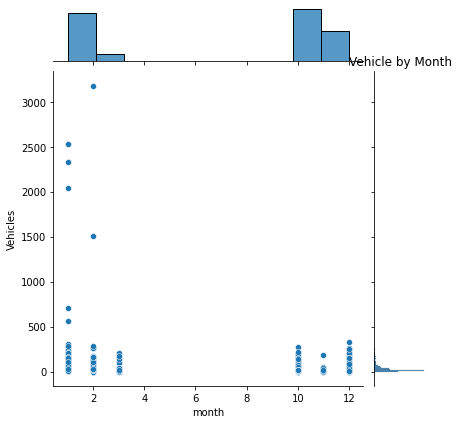

In [27]:
#Now that we have dates in integers, let's visualize
plt.figure(figsize=(10,6))
sns.jointplot(x="month", y="Vehicles", data=df_transport)
plt.title('Vehicle by Month')

###Data Quality Issue #3:
Rename a Feature Column and Remove a Value.
Our feature columns have different "capitalizations" in their names, e.g. both upper and lower "case". In addition, there are "spaces" in some of the column names. In addition, we are only interested in years greater than 2006, not "<2006".


In [28]:
#Let's remove all the spaces for feature columns by renaming them.
df_transport=df_transport.rename(columns= {'Date':'date', 'Zip Code':'zipcode', 'Model Year':'modelyear', 'Fuel':'fuel', 'Make':'make', 'Light_Duty':'lightduty', 'Vehicles':'vehicles'})


#let's view the changes
df_transport.head(2)

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1


In [30]:
#let create a copy of the dataframe to avoid copy warning issues.
#TODO 3b
df=df_transport.loc[df_transport.modelyear != '<2006'].copy()

In [33]:
#Let's confirm that the model year value '<2006' has been removed by doing a value count
df['modelyear'].value_counts(0)

2007    53
2008    45
2006    36
2010    34
2014    31
2015    30
2017    29
2016    29
2013    27
2009    25
2012    25
2011    24
2018    23
2019     5
Name: modelyear, dtype: int64

#### Data Quality Issue #4:  
##### Handling Categorical Columns

The feature column "lightduty" is categorical and has a "Yes/No" choice.  We cannot feed values like this into a machine learning model.  We need to convert the binary answers from strings of yes/no to integers of 1/0.  There are various methods to achieve this.  We will use the "apply" method with a lambda expression.  Pandas. apply() takes a function and applies it to all values of a Pandas series.

##### What is a Lambda Function?

Typically, Python requires that you define a function using the def keyword. However, lambda functions are anonymous -- which means there is no need to name them. The most common use case for lambda functions is in code that requires a simple one-line function (e.g. lambdas only have a single expression).  

As you progress through the Course Specialization, you will see many examples where lambda functions are being used.  Now is a good time to become familiar with them.

In [34]:
#let view our data
df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
3,2018-10-01,90000.0,2017,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
16,2018-10-09,90001.0,2006,Diesel and Diesel Hybrid,Type_C,No,16.0,2018,10,9
17,2018-10-10,90001.0,2006,Diesel and Diesel Hybrid,OTHER/UNK,No,23.0,2018,10,10


In [36]:
#let's count the number of "Yes/No" are in the lightduty firld
df.lightduty.value_counts()

Yes    374
No      42
Name: lightduty, dtype: int64

In [37]:
#let convert the lightduty field with Yes=1 and No- 0 using the apply function()
df.loc[:,'lightduty']=df['lightduty'].apply(lambda x:0 if x=='No' else 1)
df.lightduty.value_counts()

1    374
0     42
Name: lightduty, dtype: int64

In [38]:
df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,1,1.0,2018,10,1
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,1,1.0,2018,10,1
3,2018-10-01,90000.0,2017,Gasoline,OTHER/UNK,1,1.0,2018,10,1
16,2018-10-09,90001.0,2006,Diesel and Diesel Hybrid,Type_C,0,16.0,2018,10,9
17,2018-10-10,90001.0,2006,Diesel and Diesel Hybrid,OTHER/UNK,0,23.0,2018,10,10


One-Hot Encoding Categorical Feature Columns
Machine learning algorithms expect input vectors and not categorical features. Specifically, they cannot handle text or string values. Thus, it is often useful to transform categorical features into vectors.

One transformation method is to create dummy variables for our categorical features. Dummy variables are a set of binary (0 or 1) variables that each represent a single class from a categorical feature. We simply encode the categorical variable as a one-hot vector, i.e. a vector where only one element is non-zero, or hot. With one-hot encoding, a categorical feature becomes an array whose size is the number of possible choices for that feature.

Panda provides a function called "get_dummies" to convert a categorical variable into dummy/indicator variables.

In [40]:
#Converting categoricla variables into dummy veraibales using pandas get_dummies
data_dummy=pd.get_dummies(df[["zipcode", "modelyear", "fuel", "make"]], drop_first=True)
data_dummy.head()

,zipcode,modelyear_2007,modelyear_2008,modelyear_2009,modelyear_2010,modelyear_2011,modelyear_2012,modelyear_2013,modelyear_2014,modelyear_2015,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,90000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90001.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,90000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,90001.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,90001.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#4a: Merge (concatenate) original data frame with 'dummy' dataframe.
new_df=pd.concat([df, data_dummy], axis=1)
new_df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,year,month,day,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
3,2018-10-01,90000.0,2017,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
16,2018-10-09,90001.0,2006,Diesel and Diesel Hybrid,Type_C,0,16.0,2018,10,9,...,0,0,0,0,0,0,0,0,0,0
17,2018-10-10,90001.0,2006,Diesel and Diesel Hybrid,OTHER/UNK,0,23.0,2018,10,10,...,0,0,0,0,0,0,0,0,0,0


In [48]:
 #4b: Drop attributes for which we made dummy variables.
 new_df=new_df.drop(["zipcode", "modelyear", "fuel", "make"], axis=1)
 new_df.head()

,date,lightduty,vehicles,year,month,day,modelyear_2007,modelyear_2008,modelyear_2009,modelyear_2010,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,2018-10-01,1,1.0,2018,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018-10-01,1,1.0,2018,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018-10-01,1,1.0,2018,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,2018-10-09,0,16.0,2018,10,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,2018-10-10,0,23.0,2018,10,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
 new_df=new_df.drop(["date"], axis=1)
 new_df.head()

,lightduty,vehicles,year,month,day,modelyear_2007,modelyear_2008,modelyear_2009,modelyear_2010,modelyear_2011,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,1,1.0,2018,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,2018,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,2018,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,16.0,2018,10,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,23.0,2018,10,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Data Quality Issue #5:
Temporal Feature Columns
Our dataset now contains year, month, and day feature columns. Let's convert the month and day feature columns to meaningful representations as a way to get us thinking about changing temporal features -- as they are sometimes overlooked.

Note that the Feature Engineering course in this Specialization will provide more depth on methods to handle year, month, day, and hour feature columns.

First, let's print the unique values for "month" and "day" in our dataset.

In [51]:
print('Unique values of month;', new_df.month.unique())
print('Unique values of day', new_df.day.unique())
print('Unique value of year', new_df.year.unique())

Unique values of month; [10 11 12  1  2  3]
Unique values of day [ 1  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
  2  3  4  5  6  7  8]
Unique value of year [2018 2019]


Next, we map each temporal variable onto a circle such that the lowest value for that variable appears right next to the largest value. We compute the x- and y- component of that point using sin and cos trigonometric functions. Don't worry, this is the last time we will use this code, as you can develop an input pipeline to address these temporal feature columns in TensorFlow and Keras - and it is much easier! But, sometimes you need to appreciate what you're not going to encounter as you move through the course!

Run the cell to view the output.

Lab Task #5: Drop month, and day



In [52]:
new_df['day_sin'] = np.sin(new_df.day*(2.*np.pi/31))
new_df['day_cos'] = np.cos(new_df.day*(2.*np.pi/31))
new_df['month_sin'] = np.sin((new_df.month-1)*(2.*np.pi/12))
new_df['month_cos'] = np.cos((new_df.month-1)*(2.*np.pi/12))

#Drop month and day
new_df=new_df.drop(["month", "day"], axis=1)
new_df.head()

,lightduty,vehicles,year,modelyear_2007,modelyear_2008,modelyear_2009,modelyear_2010,modelyear_2011,modelyear_2012,modelyear_2013,...,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y,day_sin,day_cos,month_sin,month_cos
0,1,1.0,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.201299,0.979530,-1.0,-1.836970e-16
1,1,1.0,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.201299,0.979530,-1.0,-1.836970e-16
3,1,1.0,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.201299,0.979530,-1.0,-1.836970e-16
16,0,16.0,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.968077,-0.250653,-1.0,-1.836970e-16
17,0,23.0,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.897805,-0.440394,-1.0,-1.836970e-16
